## Introduction to NetworkX

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


G = nx.Graph()

G.add_nodes_from([1, 2, 3, 4, 5, 6])

G.nodes()

In [ ]:
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(1,4)

G.edges()

In [ ]:
G.nodes[1]["color"] = "blue"


G.nodes[1]['x'] = 8

G.nodes(data=True)

In [ ]:
nx.draw(G)

plt.show()

In [ ]:
# prompt: draw with the labels and metadata

import networkx as nx
import matplotlib.pyplot as plt


G = nx.Graph()

G.add_nodes_from([1, 2, 3, 4, 5, 6])

G.nodes()
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(1,4)

G.edges()
# # Importing metadata
G.nodes[1]["color"] = "blue"


G.nodes[1]['x'] = 8

node_labels = {node: str(node) for node in G.nodes()}
node_colors = [data.get("color", "red") for _, data in G.nodes(data=True)]

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, labels=node_labels, node_color=node_colors)

plt.show()

In [ ]:
L = nx.Graph()

L.add_nodes_from(["México", "USA"])

L.add_edge("México", "USA")

nx.draw(L, with_labels = True)
plt.show()

# Watts and Strogatz results

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Set the number of subplots
num_plots = 20
fig, axes = plt.subplots(10, 2, figsize=(8, 40))
axes = axes.flatten()

# Loop through the values of p and plot each graph in a subplot
for idx, p in enumerate(np.logspace(-4, 0, num_plots)):
    small_world = nx.newman_watts_strogatz_graph(n=60, k=6, p=p, seed=1)
    nx.draw_circular(small_world, node_size=10, ax=axes[idx])
    axes[idx].set_title(f'p={p:.1f}')



# plt.subplots_adjust(hspace=0.2, wspace=0.8)
plt.tight_layout()
plt.show()

In [ ]:


transitivity = []
average_path_length = []
p_values = np.logspace(-4, 0, 1000)


# Compute the transitivity and average length path for each graph
for p in p_values:
    small_world = nx.newman_watts_strogatz_graph(n=600, k=6, p=p, seed=0)
    transitivity.append(nx.transitivity(small_world) / 0.6)
    average_path_length.append(nx.average_shortest_path_length(small_world) / 50)

# Plot the results
plt.plot(p_values, transitivity, label='Transitivity')
plt.plot(p_values, average_path_length, label='Average Path Length', )
plt.xlabel('p')
plt.xscale('log')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Plot the results
plt.scatter(p_values, transitivity, label='Transitivity', s=0.5)
plt.scatter(p_values, average_path_length, label='Average Path Length', s=0.5)
plt.xlabel('p')
plt.xscale('log')
plt.legend()
plt.tight_layout()
plt.show()


# Model applied to Mexico City

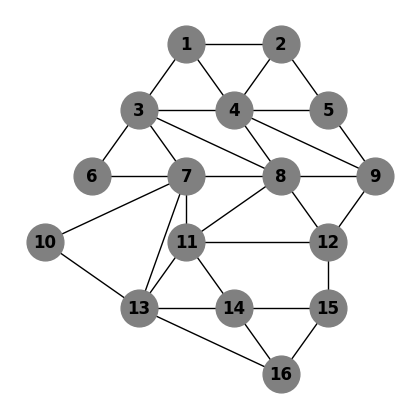

In [1]:
import numpy as np
import scipy as sp
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
G = nx.Graph()

# Add nodes
nodes = range(1, 17)
G.add_nodes_from(nodes)

# Add edges based on the visual structure
edges = [
    (1, 2), (1, 3), (1, 4), (2, 4), (2,5), (3, 4), (3, 6), (3, 7), (3, 8), (4, 5), (4, 8), (4, 9),
    (5, 9), (6, 7), (7, 8), (7, 11), (7, 10), (7, 13), (8, 9), (8, 11), (8, 12), (9, 12),
    (10, 13), (11, 12), (11, 13), (11, 14), (12, 15), (13, 14), (13, 16) ,(14, 15),
    (14, 16), (15, 16)
]
G.add_edges_from(edges)

# Approximate positions for each node based on the image
positions = {
    1: (0.5, 3.5), 2: (1.5, 3.5), 3: (0, 2.5), 4: (1, 2.5), 5: (2, 2.5),
    6: (-0.5, 1.5), 7: (0.5, 1.5), 8: (1.5, 1.5), 9: (2.5, 1.5),
    10: (-1, 0.5), 11: (0.5, 0.5), 12: (2, 0.5), 13: (0, -0.5),
    14: (1, -0.5), 15: (2, -0.5), 16: (1.5, -1.5)
}

# Draw the graph
plt.figure(figsize=(4, 4))
nx.draw(G, pos=positions, with_labels=True, node_color='gray', edge_color='black', node_size=700, font_weight='bold')
plt.show()



In [2]:
# Get the adjacency matrix as a numpy array
A = nx.adjacency_matrix(G).todense()
print(A)
print(type(A))
# Check if the matrix is symmetric
print(np.allclose(A, A.T))

[[0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0]
 [1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 0]
 [0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0]
 [0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0]
 [0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0]]
<class 'numpy.ndarray'>
True


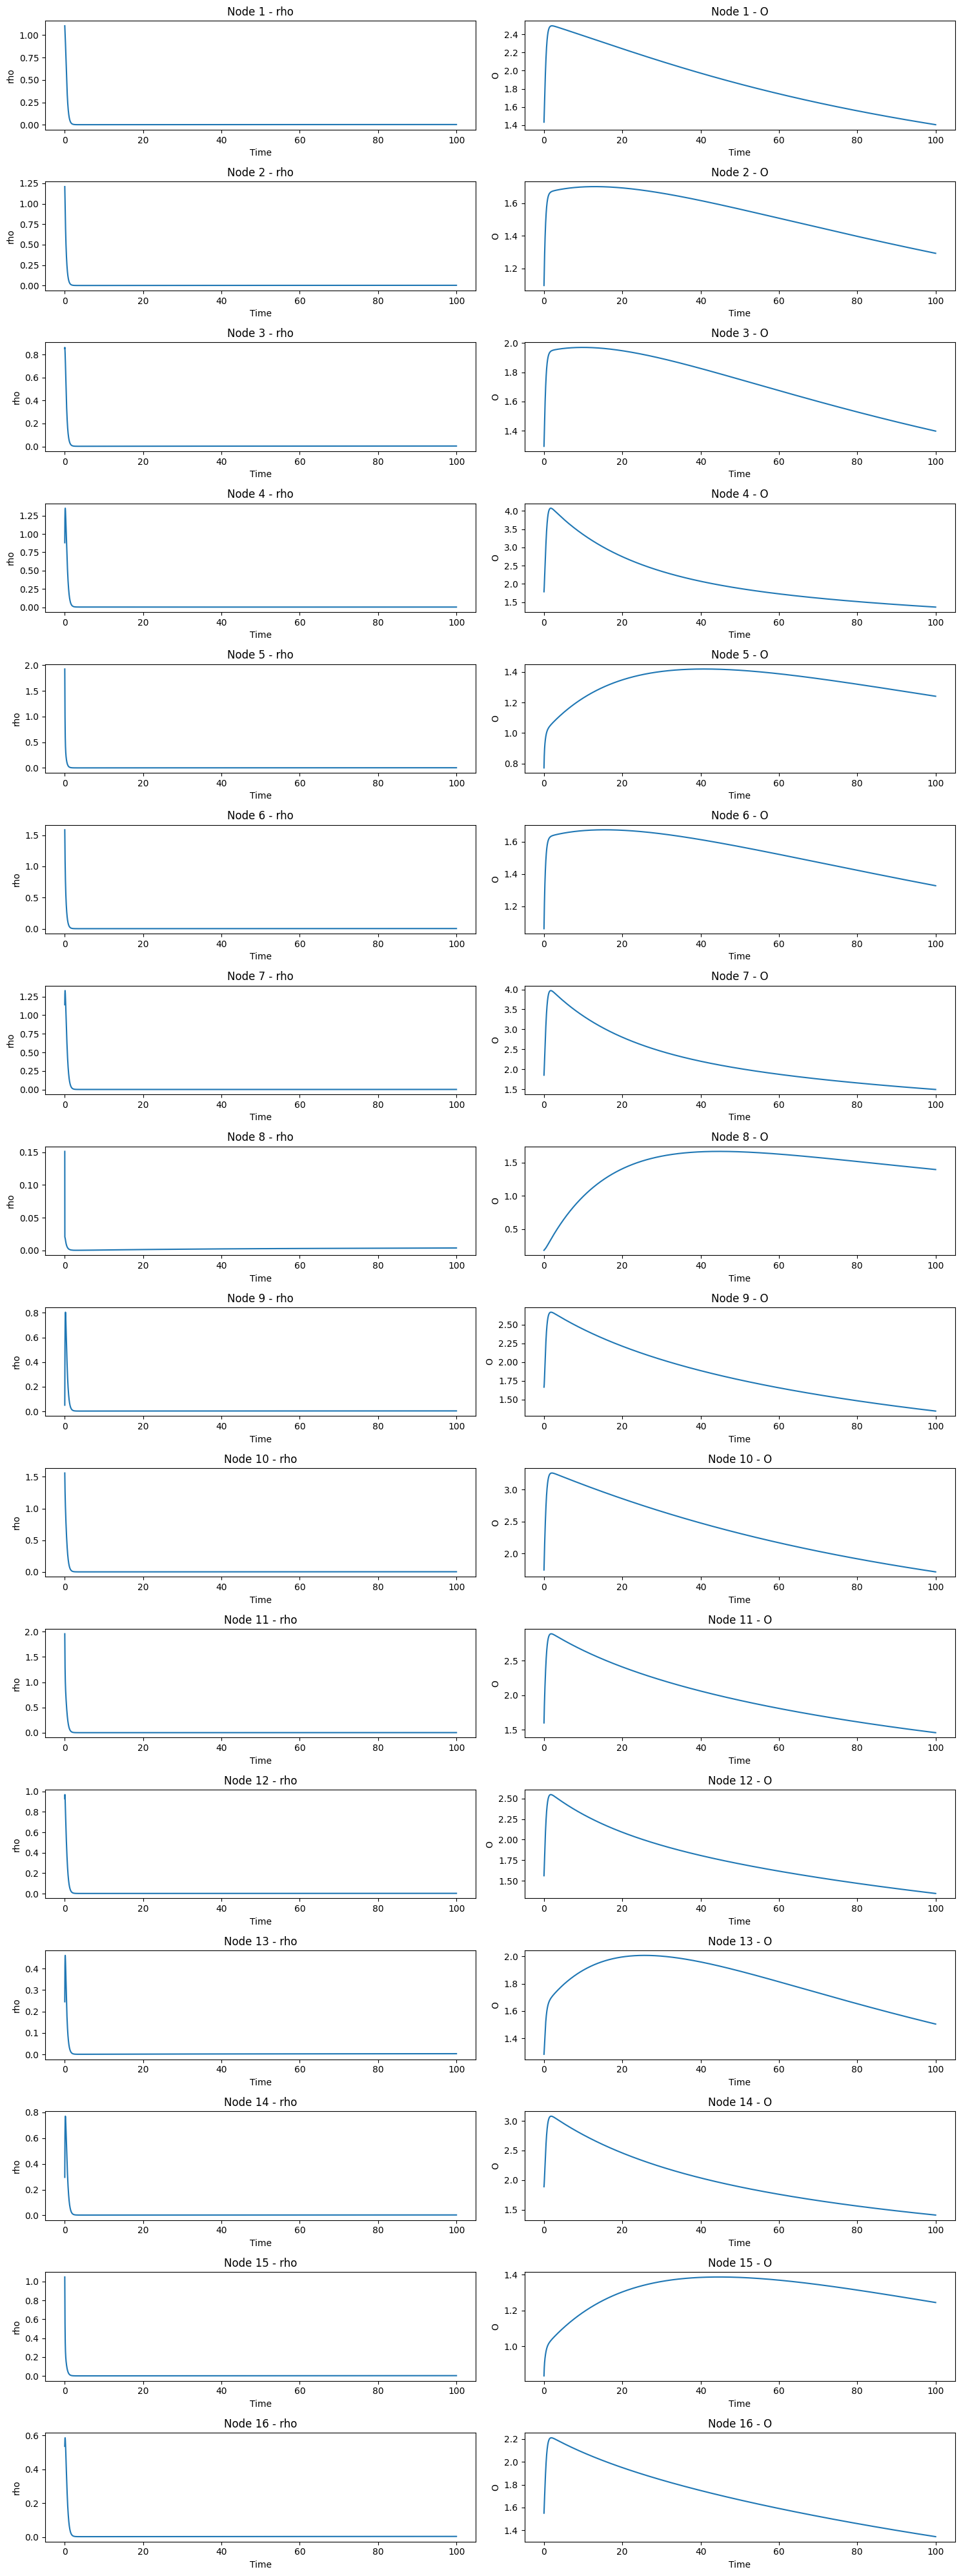

In [3]:
# Define the system of ODEs
alpha = 0.0050415
beta = 0.000013047
delta = 0.0079639
do = 0.0065095
numerator = 2 * delta**2 * beta + do * (alpha + beta)**2 + 2 * (alpha + beta) * delta * np.sqrt(2 * do * (alpha + beta))
denominator = 2 * alpha * delta**2
Ic = numerator / denominator
I = Ic + 0.5

def system(t, y, A, alpha, beta, delta, do, I):
    """
    y[k][0] is rho
    y[k][1] is O
    16 repetitions for each municipality
    2 variables, rho and O
    """


    y = y.reshape(16, 2)
    
    dydt = np.zeros_like(y)

    

    def function_1(j):
        return A[i][j] * (y[j][0] - y[i][0])
    
    def function_2(j):
        return A[i][j] * ((y[i][1]/y[j][1])**I * y[j][0] - (y[j][1]/y[i][1])**I * y[i][0])
    
    def function_3(j):
        return A[i][j] * (y[j][1] - y[i][1])
    
    j = np.arange(16)
    

    for i in range(16):
        f_1_j = np.vectorize(function_1)(j)
        f_2_j = np.vectorize(function_2)(j)
        f_3_j = np.vectorize(function_3)(j)
        dydt[i, 0] = -y[i, 0] * y[i, 1] + alpha + np.sum(f_1_j) + np.sum(f_2_j)
        dydt[i, 1] = -delta * y[i, 1] + beta + y[i, 0] * y[i, 1] + do * np.sum(f_3_j)

    return dydt.flatten()
    


# Initial conditions
np.random.seed(0)
y0 = np.random.uniform(0.01, 2, 32)

# Time span
t_span = (0, 100)
t_eval = np.linspace(*t_span, 10000)

# Solve the system of ODEs
solution = sp.integrate.solve_ivp(system, t_span, y0, args=(A, alpha, beta, delta, do, I), t_eval=t_eval)

t = solution.t
y = solution.y.reshape(16, 2, -1)

# Plot the results using subplots
fig, axes = plt.subplots(16, 2, figsize=(15, 40))

for i in range(16):
    axes[i, 0].plot(t, y[i, 0])
    axes[i, 0].set_xlabel('Time')
    axes[i, 0].set_ylabel('rho')
    axes[i, 0].set_title(f'Node {i + 1} - rho')

    axes[i, 1].plot(t, y[i, 1])
    axes[i, 1].set_xlabel('Time')
    axes[i, 1].set_ylabel('O')
    axes[i, 1].set_title(f'Node {i + 1} - O')

plt.tight_layout()
plt.show()
    


In [65]:
solution.y.shape

(32, 1000)